In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from datetime import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings

In [69]:
data_pd = pd.read_csv('COCO_COLA.csv')
con = data_pd['Date']
data_pd['Date'] = pd.to_datetime(data_pd['Date'])
data_pd.set_index('Date', inplace=True)
data_pd.index
ts = data_pd['High']

data_pd = data_pd.asfreq(freq='D')

In [52]:
data_pd

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133    806400
1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   1574400
1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374    844800
1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   1420800
1962-01-08   0.251302   0.251302   0.245768   0.250651   0.048728   2035200
...               ...        ...        ...        ...        ...       ...
2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998  31362800
2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999  24806600
2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001  24923800
2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002  24696900
2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000  51874400

[15096 rows x 6 columns]

In [53]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [54]:
data_pd.describe().transpose()

count          mean           std           min           25%  \
Open       15096.0  1.605620e+01  1.693930e+01      0.192708  8.606770e-01   
High       15096.0  1.618843e+01  1.706434e+01      0.193359  8.697920e-01   
Low        15096.0  1.592188e+01  1.681175e+01      0.182292  8.541670e-01   
Close      15096.0  1.606073e+01  1.694171e+01      0.192057  8.603515e-01   
Adj Close  15096.0  1.136749e+01  1.425364e+01      0.037855  2.423120e-01   
Volume     15096.0  9.032904e+06  7.935744e+06  76800.000000  2.812800e+06   

                    50%           75%           max  
Open       9.328125e+00  2.887500e+01  5.981000e+01  
High       9.398438e+00  2.916750e+01  6.013000e+01  
Low        9.218750e+00  2.856313e+01  5.962000e+01  
Close      9.351562e+00  2.890156e+01  6.013000e+01  
Adj Close  4.642848e+00  1.725108e+01  5.865000e+01  
Volume     7.585200e+06  1.291275e+07  1.241690e+08

In [30]:
data_pd.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

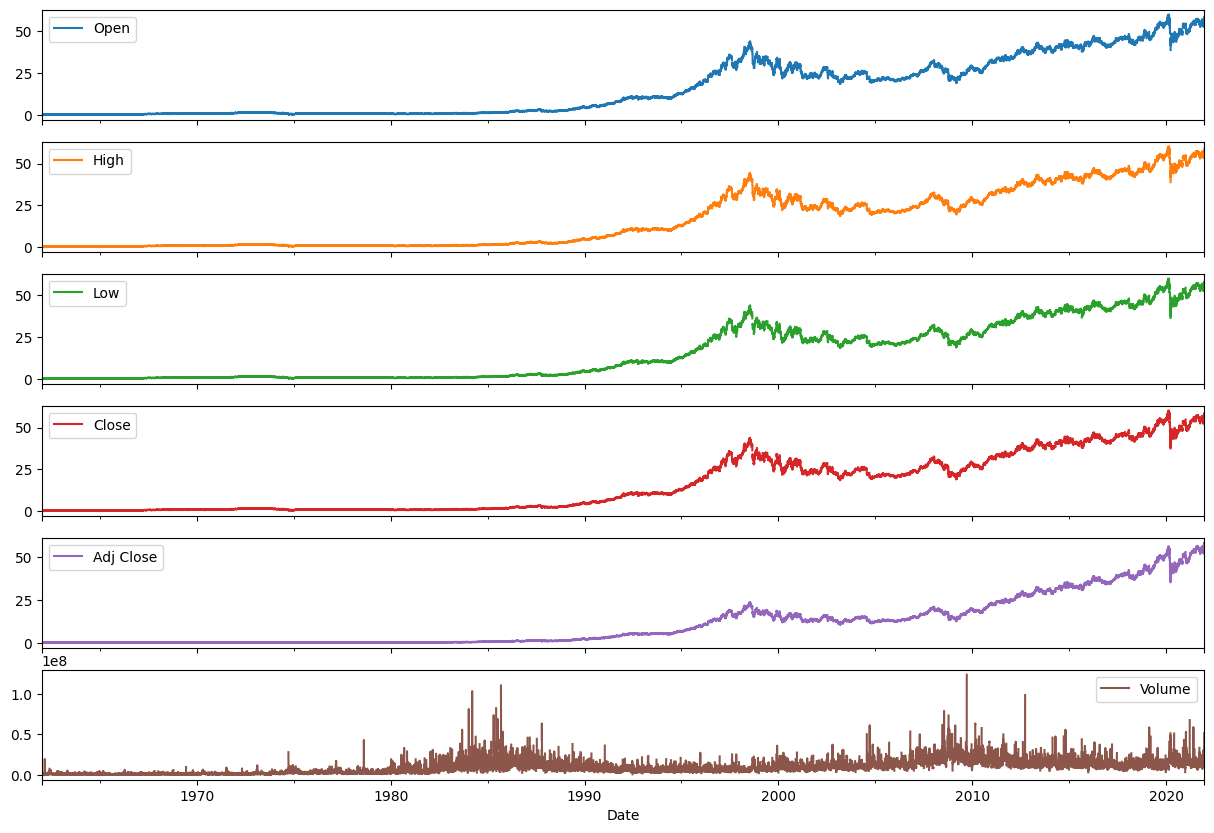

In [31]:
data_pd.plot(subplots=True, figsize=(15,10))

<Axes: xlabel='Date'>

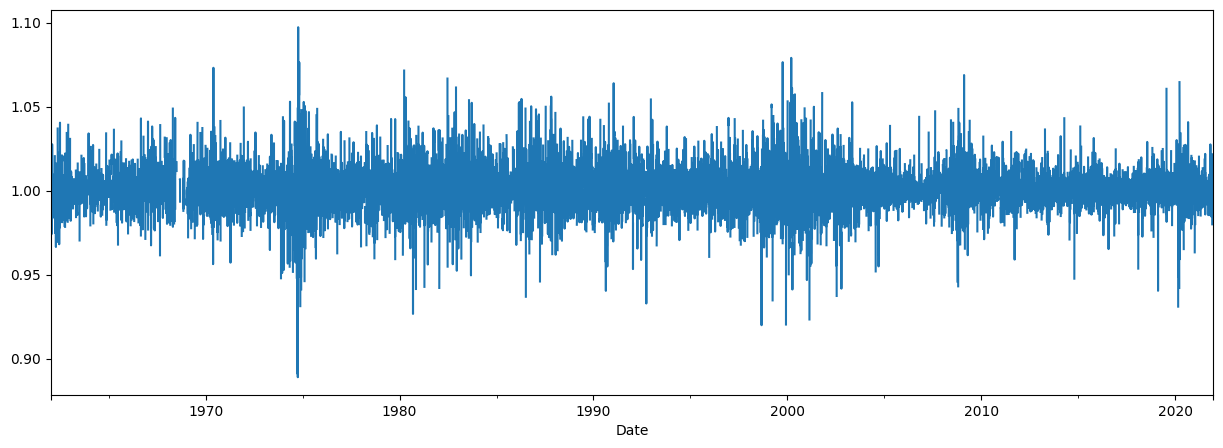

In [8]:
data = data_pd.High.div(data_pd.High.shift())
data.plot(figsize=(15,5))

<Axes: xlabel='Date'>

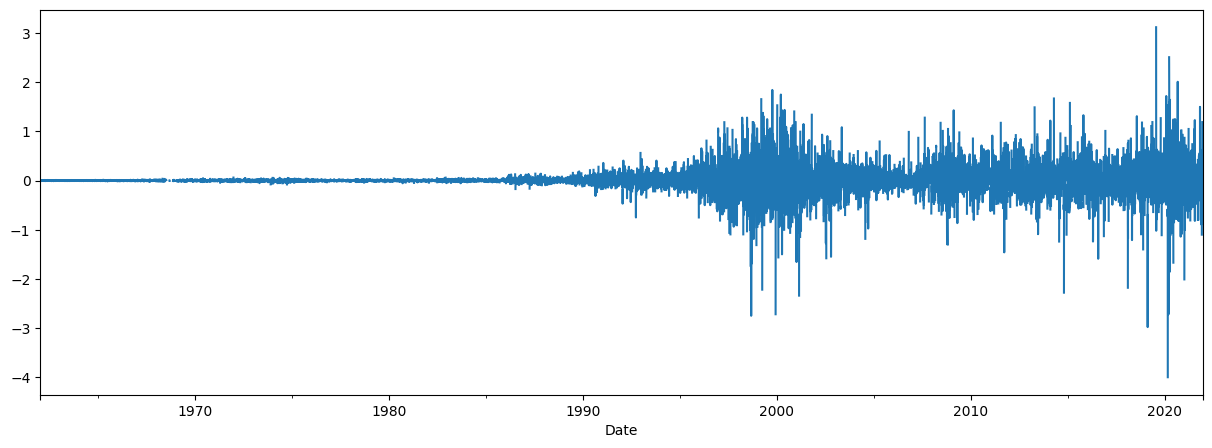

In [9]:
data_pd.High.diff().plot(figsize=(15,5))

In [10]:
trace = go.Ohlc(x = data_pd.index,
                open = data_pd.Open,
                high = data_pd.High,
                low = data_pd.Low,
                close = data_pd.Close)

data = [trace]
iplot(data)

In [11]:
data_2020 = data_pd.query('Date > "2020-01-01" & Date < "2020-07-01"')

In [12]:
trace = go.Ohlc(x = data_2020.index,
                open = data_2020.Open,
                high = data_2020.High,
                low = data_2020.Low,
                close = data_2020.Close)

data = [trace]
iplot(data) # Widać covid-19 - opisać jakoś ładnie jak już będziesz wiedzieć

In [13]:
trace = go.Candlestick(x = data_pd.index,
                open = data_pd.Open,
                high = data_pd.High,
                low = data_pd.Low,
                close = data_pd.Close)
data = [trace]
iplot(data)

In [14]:
trace = go.Candlestick(x = data_2020.index,
                open = data_2020.Open,
                high = data_2020.High,
                low = data_2020.Low,
                close = data_2020.Close)
data = [trace]
iplot(data)

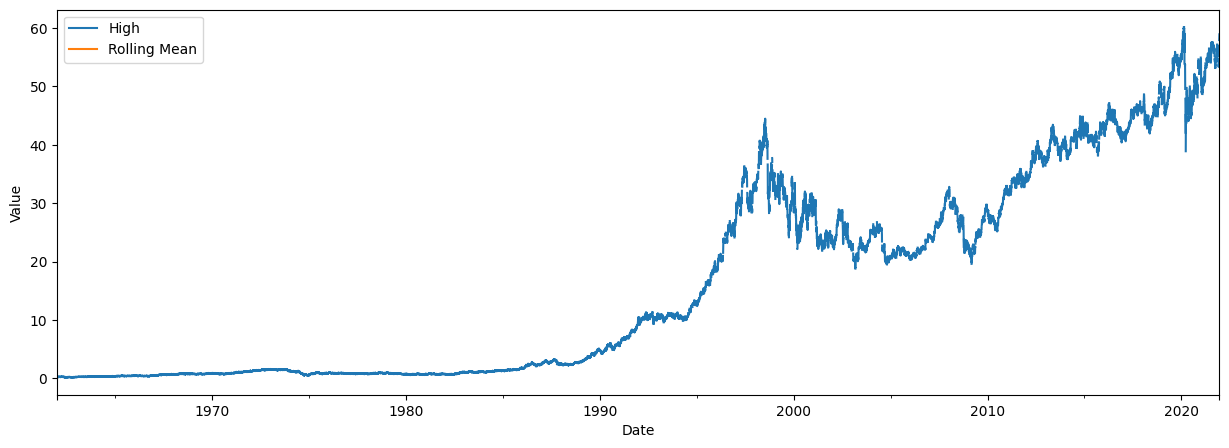

In [15]:
# Window functions

rolling_data = data_pd.High.rolling(365).mean()
data_pd.High.plot(figsize=(15,5))
rolling_data.plot(figsize=(15,5))
plt.legend(['High', 'Rolling Mean'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

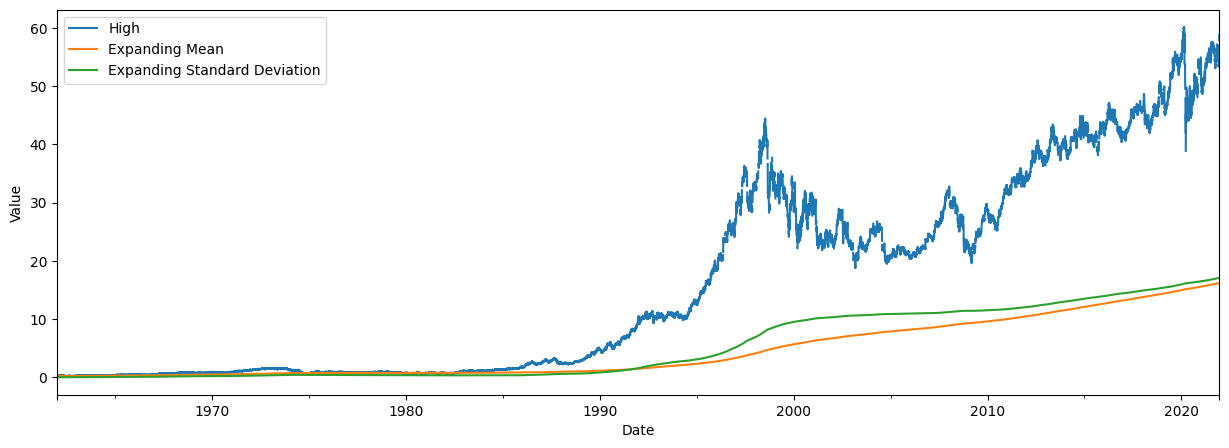

In [16]:
# Expanding window function - doczytać co to jest za funkcja

data_mean = data_pd.High.expanding().mean()
data_std = data_pd.High.expanding().std()
data_pd.High.plot(figsize=(15,5))
data_mean.plot(figsize=(15,5))
data_std.plot(figsize=(15,5))
plt.legend(['High', 'Expanding Mean', 'Expanding Standard Deviation'])
plt.ylabel('Value')
plt.show()

In [17]:
# Forecasting

In [18]:
# Convert to timeseries

In [32]:
# Specify the entire range
ts['1962-01-02':'2021-12-17']

Date
1962-01-02     0.270182
1962-01-03     0.259115
1962-01-04     0.261068
1962-01-05     0.262370
1962-01-08     0.251302
                ...    
2021-12-13    57.930000
2021-12-14    58.169998
2021-12-15    58.250000
2021-12-16    58.880001
2021-12-17    58.919998
Name: High, Length: 15096, dtype: float64

<Axes: xlabel='Date'>

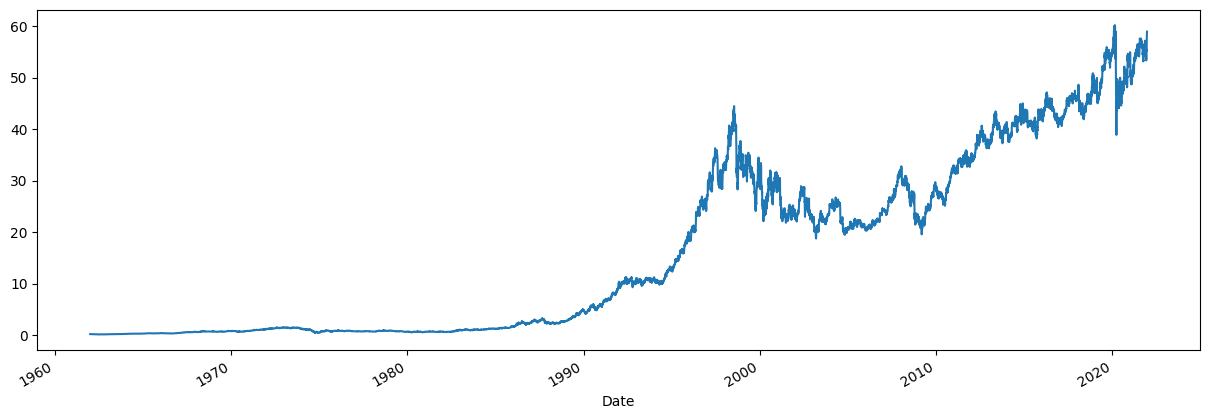

In [33]:
ts.plot(kind='line', figsize=(15,5))

In [34]:
# Stationatiry
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=100).mean()
    rolstd = timeseries.rolling(window=100).std()

    plt.figure(figsize=(15,5))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

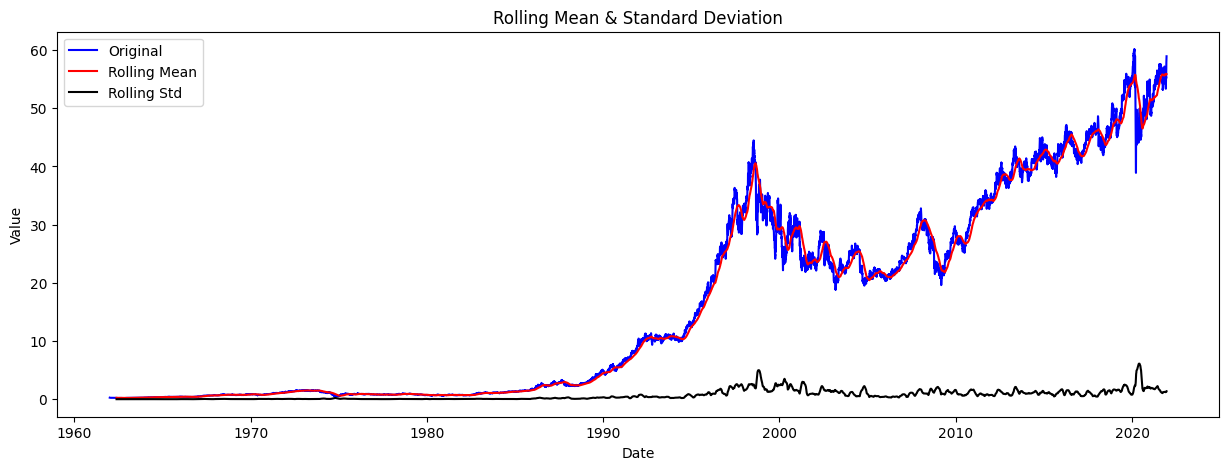

Results of Dickey-Fuller Test: 
Test Statistic                     0.618656
p-value                            0.988067
#Lags Used                        43.000000
Number of Observations Used    15052.000000
Critical Value (1%)               -3.430785
Critical Value (5%)               -2.861732
Critical Value (10%)              -2.566872
dtype: float64


In [35]:
test_stationarity(ts)

In [23]:
# This is not sationary because:

# - mean is increasing even though the std is small
# - Test stat is > critical value

# Decited to making the timeseries stationary

<Axes: xlabel='Date'>

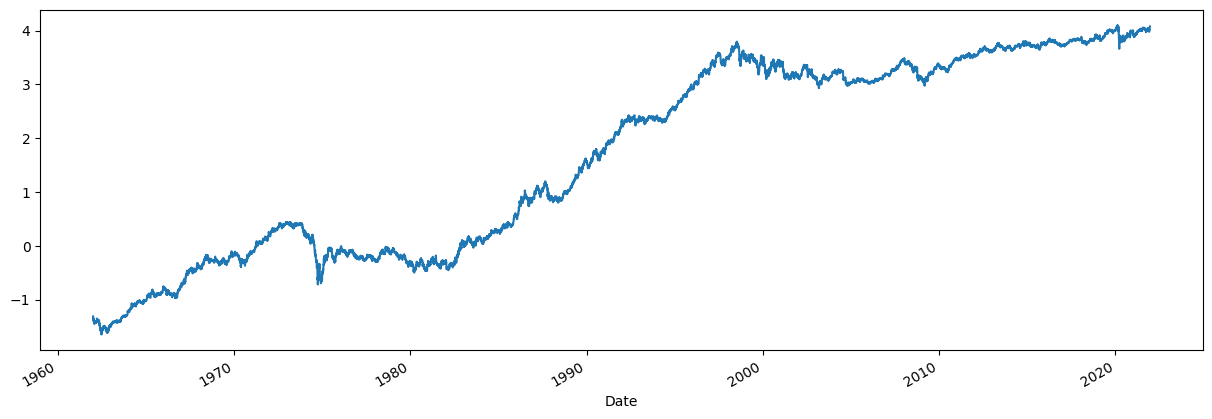

In [36]:
ts_log = np.log(ts)

ts_log.plot(kind='line', figsize=(15,5))

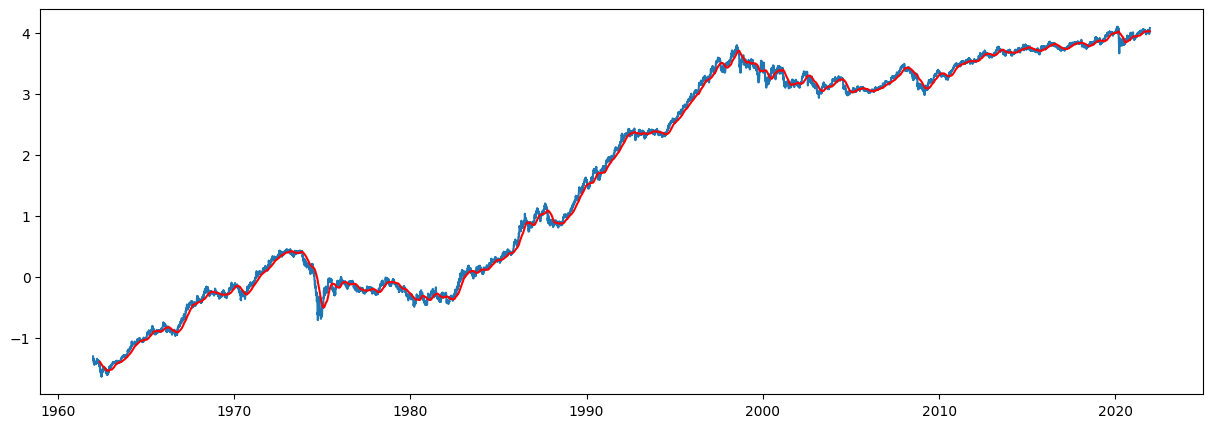

In [37]:
moving_avg = ts_log.rolling(window=100).mean()

plt.figure(figsize=(15,5))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [38]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
1962-01-02   NaN
1962-01-03   NaN
1962-01-04   NaN
1962-01-05   NaN
1962-01-08   NaN
1962-01-09   NaN
1962-01-10   NaN
1962-01-11   NaN
1962-01-12   NaN
1962-01-15   NaN
1962-01-16   NaN
1962-01-17   NaN
Name: High, dtype: float64

In [39]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(12)

Date
1962-05-23   -0.087860
1962-05-24   -0.101880
1962-05-25   -0.106170
1962-05-28   -0.126603
1962-05-29   -0.153378
1962-05-31   -0.106655
1962-06-01   -0.102198
1962-06-04   -0.127192
1962-06-05   -0.125319
1962-06-06   -0.138559
1962-06-07   -0.139684
1962-06-08   -0.119666
Name: High, dtype: float64

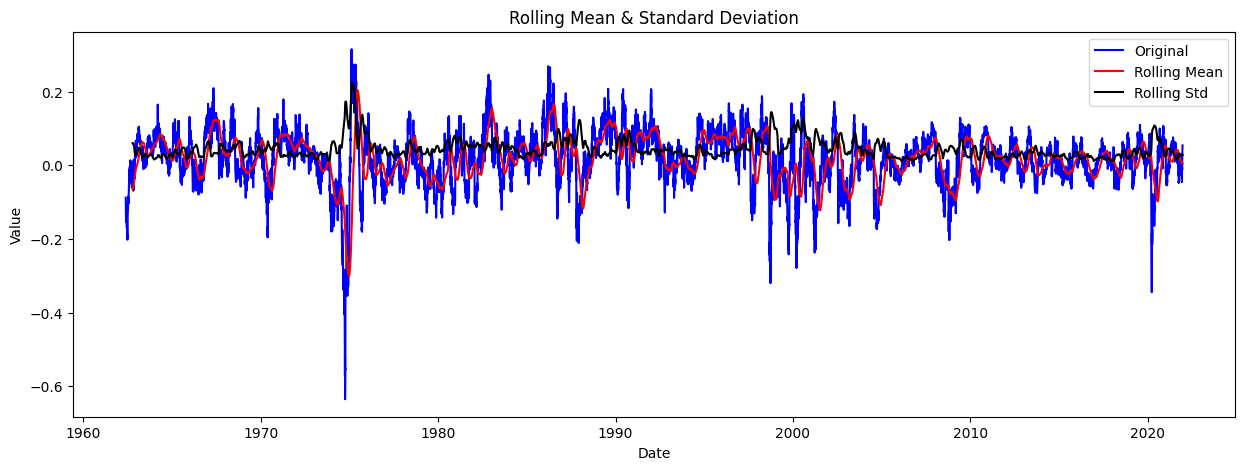

Results of Dickey-Fuller Test: 
Test Statistic                -1.158035e+01
p-value                        2.953237e-21
#Lags Used                     2.000000e+00
Number of Observations Used    1.499400e+04
Critical Value (1%)           -3.430786e+00
Critical Value (5%)           -2.861733e+00
Critical Value (10%)          -2.566873e+00
dtype: float64


In [40]:
test_stationarity(ts_log_moving_avg_diff)

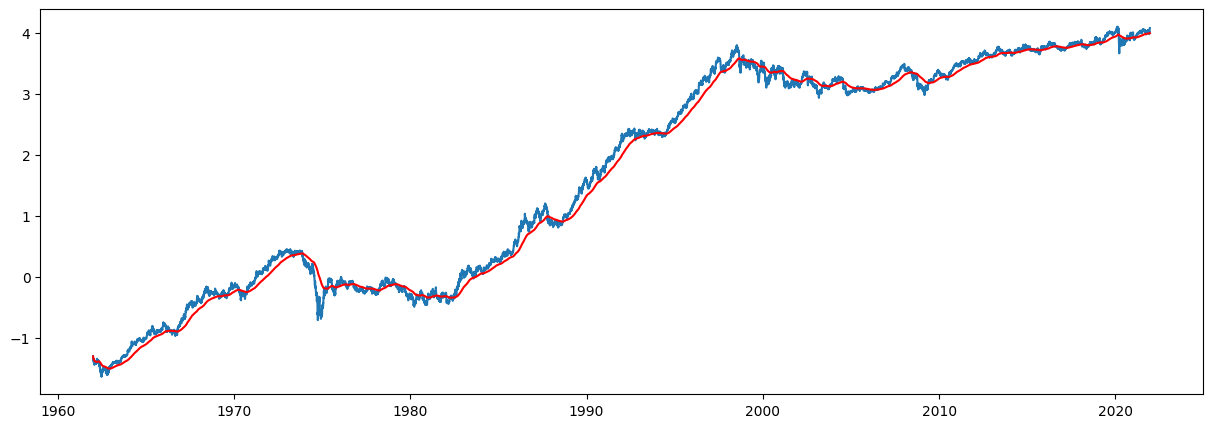

In [41]:
# Still is not

expwighted_avg = ts_log.ewm(halflife=100).mean()

plt.figure(figsize=(15,5))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

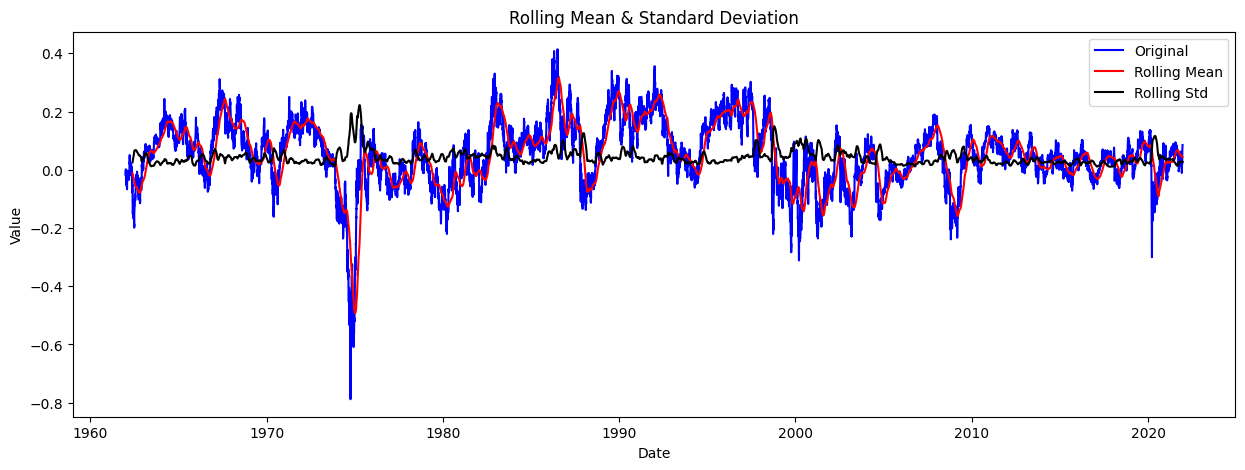

Results of Dickey-Fuller Test: 
Test Statistic                -6.844985e+00
p-value                        1.752109e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.508700e+04
Critical Value (1%)           -3.430784e+00
Critical Value (5%)           -2.861732e+00
Critical Value (10%)          -2.566872e+00
dtype: float64


In [42]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [43]:
# This is stationary because:

# - Test statistic is smaller tha 1% of the critical value
# - Rolling values have less variations in mean and standard deviation in magnitude

In [44]:
data_pd

Open       High        Low      Close  Adj Close      Volume
Date                                                                         
1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133    806400.0
1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   1574400.0
1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374    844800.0
1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   1420800.0
1962-01-06        NaN        NaN        NaN        NaN        NaN         NaN
...               ...        ...        ...        ...        ...         ...
2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998  31362800.0
2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999  24806600.0
2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001  24923800.0
2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002  24696900.0
2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000  51874400.0

[21900 rows x 6 columns]

In [70]:
# Spliting data

train = data_pd[data_pd.index < '2015-01-01']

test = data_pd[data_pd.index >= '2015-01-01']

Text(0, 0.5, 'Value')

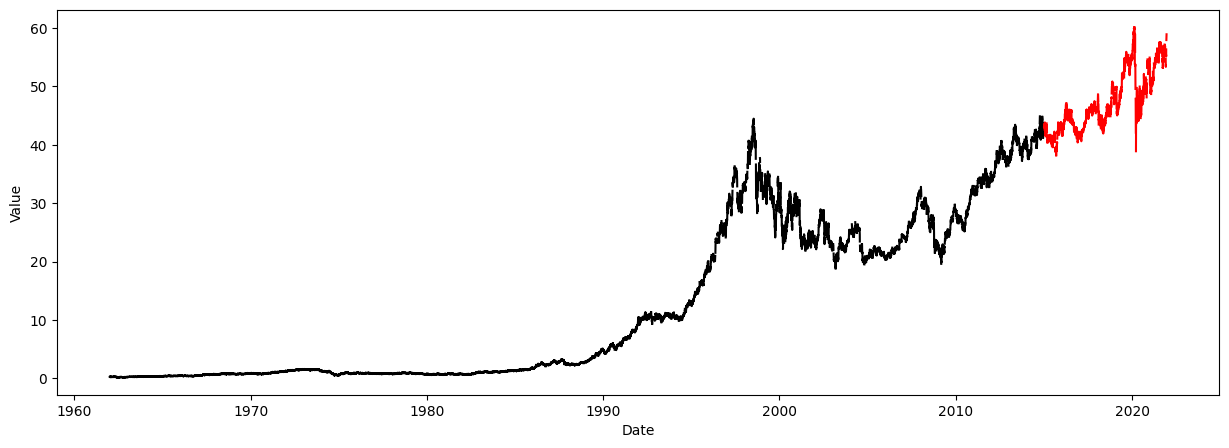

In [71]:
plt.figure(figsize=(15,5))
plt.plot(train['High'], color='black')
plt.plot(test['High'], color='red')
plt.xlabel('Date')
plt.ylabel('Value')

In [72]:
y = train['High']

In [73]:
ARIMAmodel = ARIMA(y, order = (4, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

c:\Users\kamila.nita\.conda\envs\medical2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



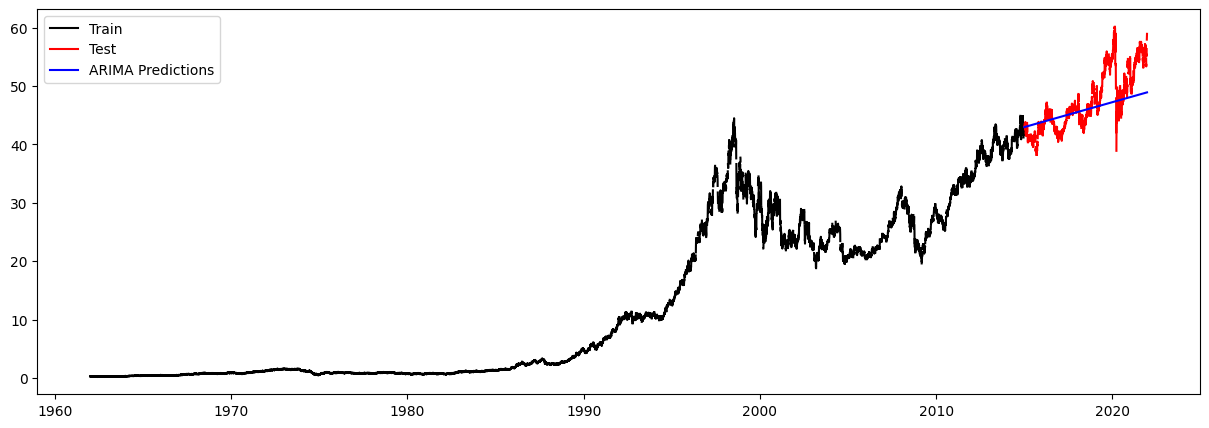

In [74]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARIMA = y_pred_df["Predictions"] 

plt.figure(figsize=(15,5))
plt.plot(train['High'], color='black', label = 'Train')
plt.plot(test['High'], color='red', label = 'Test')
plt.plot(y_pred_out_ARIMA, color='blue', label = 'ARIMA Predictions')
plt.legend()

In [79]:
SARIMAXmodel = SARIMAX(y, order = (3, 2, 1), seasonal_order=(1,1,1,6))
SARIMAXmodel = SARIMAXmodel.fit()

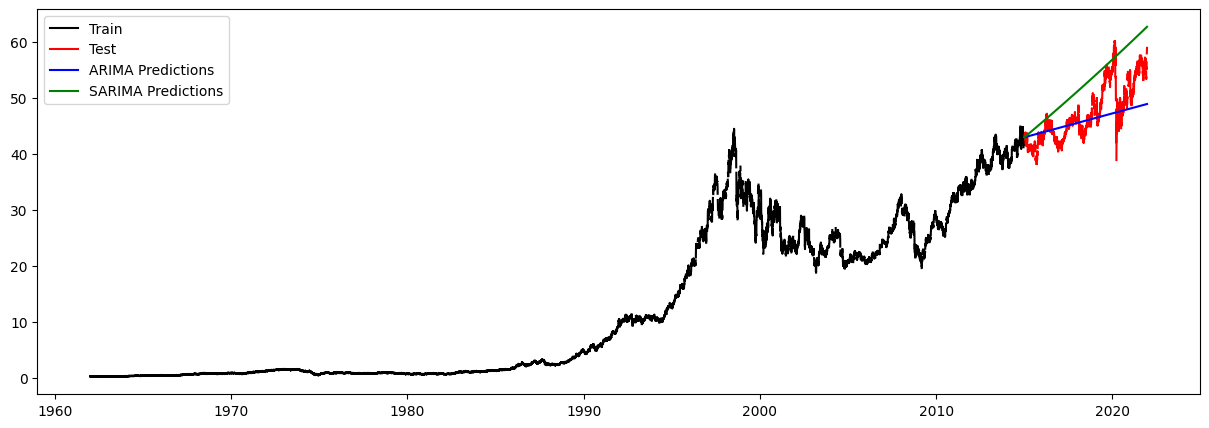

In [80]:
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_SARIMA = y_pred_df["Predictions"] 

plt.figure(figsize=(15,5))
plt.plot(train['High'], color='black', label = 'Train')
plt.plot(test['High'], color='red', label = 'Test')
plt.plot(y_pred_out_ARIMA, color='blue', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARIMA, color='green', label = 'SARIMA Predictions')
plt.legend()